<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("../assets/data/seeds.csv")

In [3]:
# Taking a peek
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

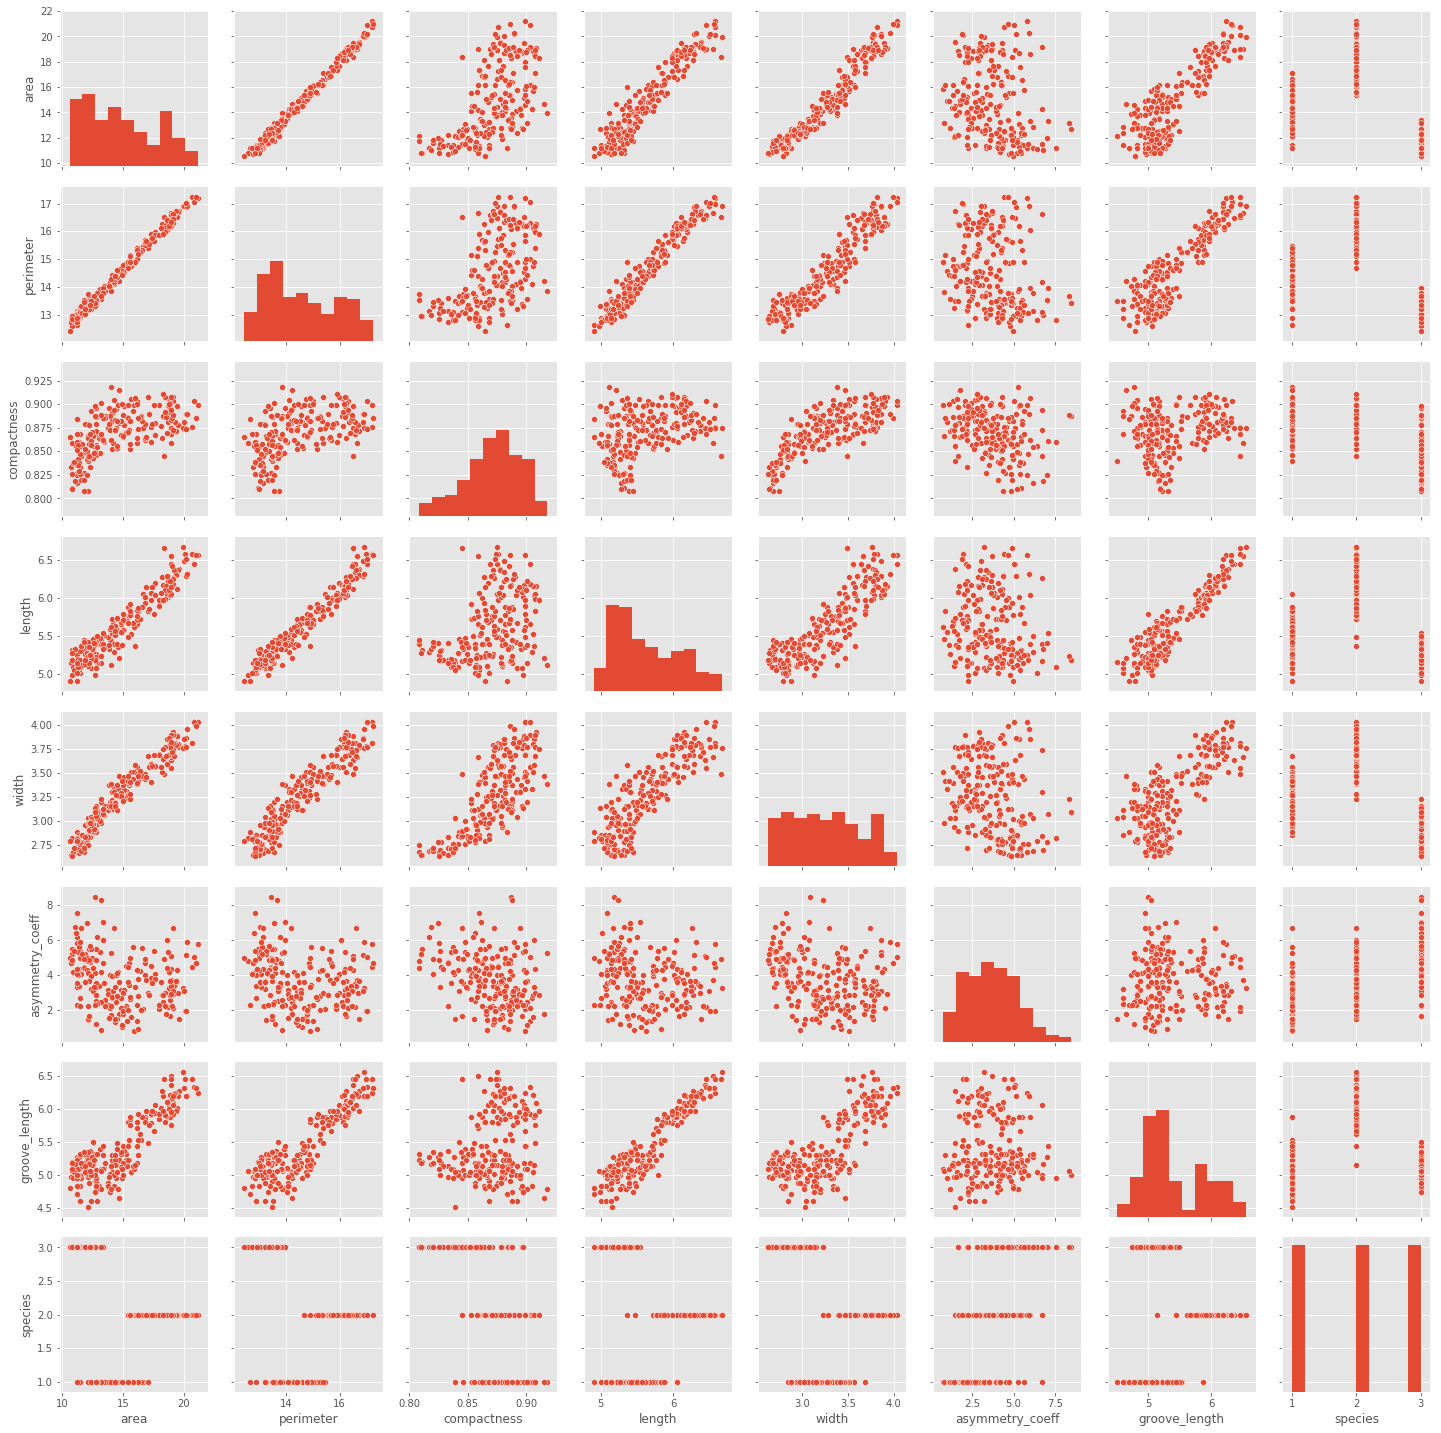

In [4]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

# Plot without the "species" hue.
sns.pairplot(seeds)

Can our naked eye see any clusters within these scatter plots?

- *groove_lenght vs. compactness looks like 2 clusters*  
- *perimiter vs. groove_length maybe 3 clusters*

In [5]:
# Check for nulls
seeds.isnull().sum()
# there is a value for every position in the DF

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

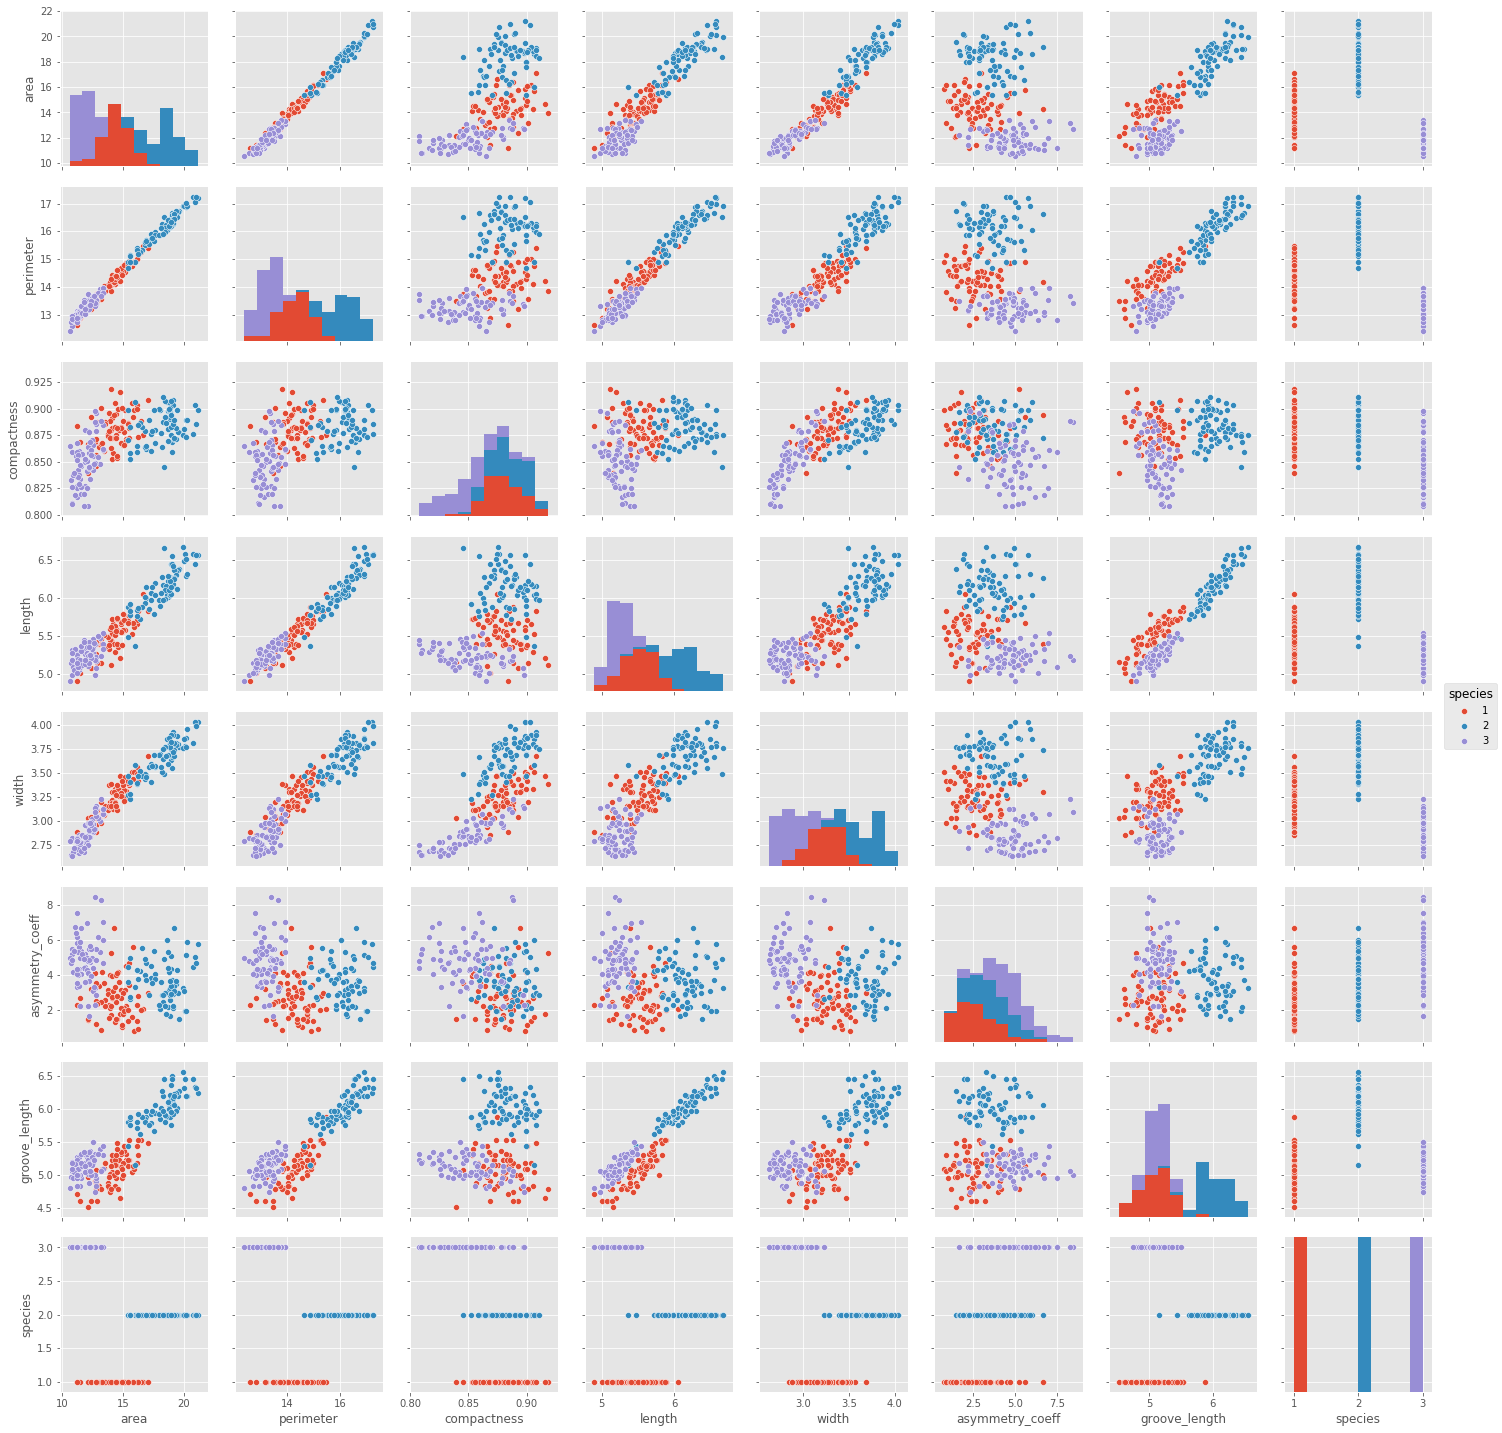

In [6]:
# Look at the real species labels.
sns.pairplot(data=seeds, hue='species')
# classes appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

In [7]:
seeds.species.value_counts()
# all classes are equally distributed. 

3    70
2    70
1    70
Name: species, dtype: int64

In [8]:
# Check datatypes
seeds.dtypes
# We got an odd-ball, that species guy.

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [9]:
# drop 'species', which is currently acting as a target (categorical)
X = seeds.drop('species', axis = 1)
y = seeds.species

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [10]:
from sklearn.cluster import KMeans

# 2 Clusters
k_mean = KMeans()
k_mean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for out first clustering model.

In [11]:
# Labels and centroids for 8 Clusters
labels = k_mean.labels_
print(labels)
clusters = k_mean.cluster_centers_
clusters

[2 2 6 6 2 6 6 6 2 2 4 6 6 6 6 6 7 2 2 0 6 6 2 3 2 2 3 3 6 6 3 4 6 6 2 2 2
 4 6 7 6 6 3 4 6 6 2 6 6 2 6 4 6 6 2 2 6 2 2 3 3 3 3 6 3 3 2 6 2 3 4 4 4 5
 4 4 4 1 1 4 4 1 1 5 5 5 5 5 1 1 5 5 5 1 1 4 5 5 5 5 4 5 1 5 5 5 5 4 5 5 5
 5 5 1 1 5 1 5 5 5 1 5 4 5 4 1 1 5 5 4 5 5 4 4 4 6 4 2 2 4 7 7 7 7 0 7 3 0
 3 0 0 7 0 0 0 0 0 0 0 0 3 0 0 0 7 3 0 0 0 0 7 7 0 0 0 0 0 0 7 3 0 0 0 0 7
 0 0 0 7 0 0 0 0 0 0 0 7 0 3 3 7 3 0 7 0 0 0 7 0 7]


array([[11.67413043, 13.16804348,  0.8454913 ,  5.21017391,  2.81332609,
         4.53654348,  5.10021739],
       [19.58333333, 16.646     ,  0.88772667,  6.31586667,  3.83506667,
         5.08153333,  6.1444    ],
       [15.3973913 , 14.82      ,  0.88075652,  5.69347826,  3.35973913,
         1.77578696,  5.30369565],
       [12.435     , 13.425     ,  0.86675   ,  5.21905   ,  2.9734    ,
         2.410955  ,  4.91815   ],
       [16.52958333, 15.375     ,  0.87835   ,  5.87841667,  3.47758333,
         4.22025   ,  5.70641667],
       [18.95454545, 16.38878788,  0.8868    ,  6.24748485,  3.74469697,
         2.72354545,  6.11945455],
       [14.20166667, 14.23833333,  0.88028667,  5.4936    ,  3.23506667,
         3.00813333,  5.08066667],
       [12.42736842, 13.45736842,  0.86081053,  5.27357895,  2.97563158,
         6.40363158,  5.11868421]])

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels)

0.3624620243618394

In [13]:
# Considering silhouette is on a scale of -1 to 1, 0.35 isnt too bad.

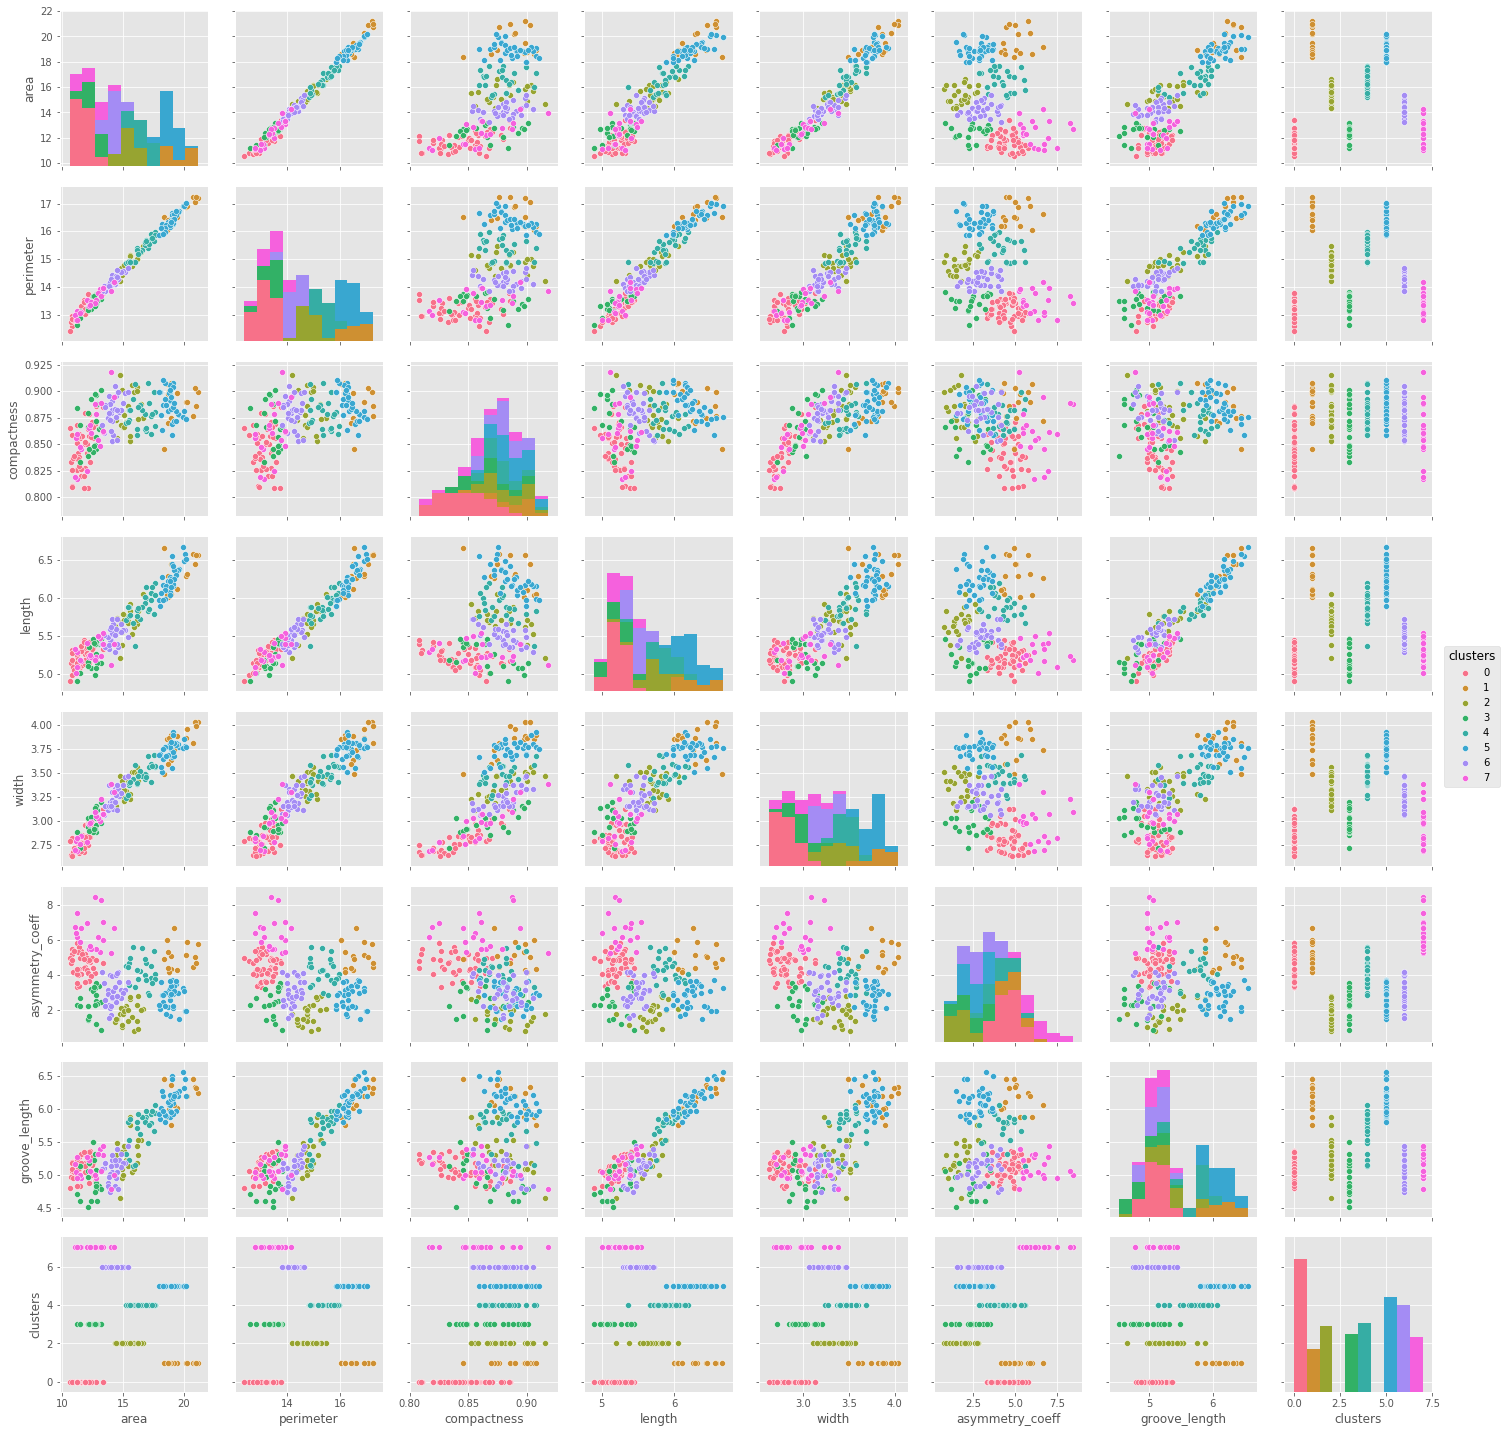

In [14]:
# visually examine the cluster that have been created
X_8 = seeds.drop('species', axis=1)
X_8['clusters']=labels

sns.pairplot(data=X_8, hue='clusters')

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [15]:
import random

random.randint(1,25), random.randint(1,25)

(8, 6)

In [16]:
# 4 Clusters
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(X)
labels_4 = k_mean4.labels_
silhouette_score(X, labels_4)

0.4125280237529814

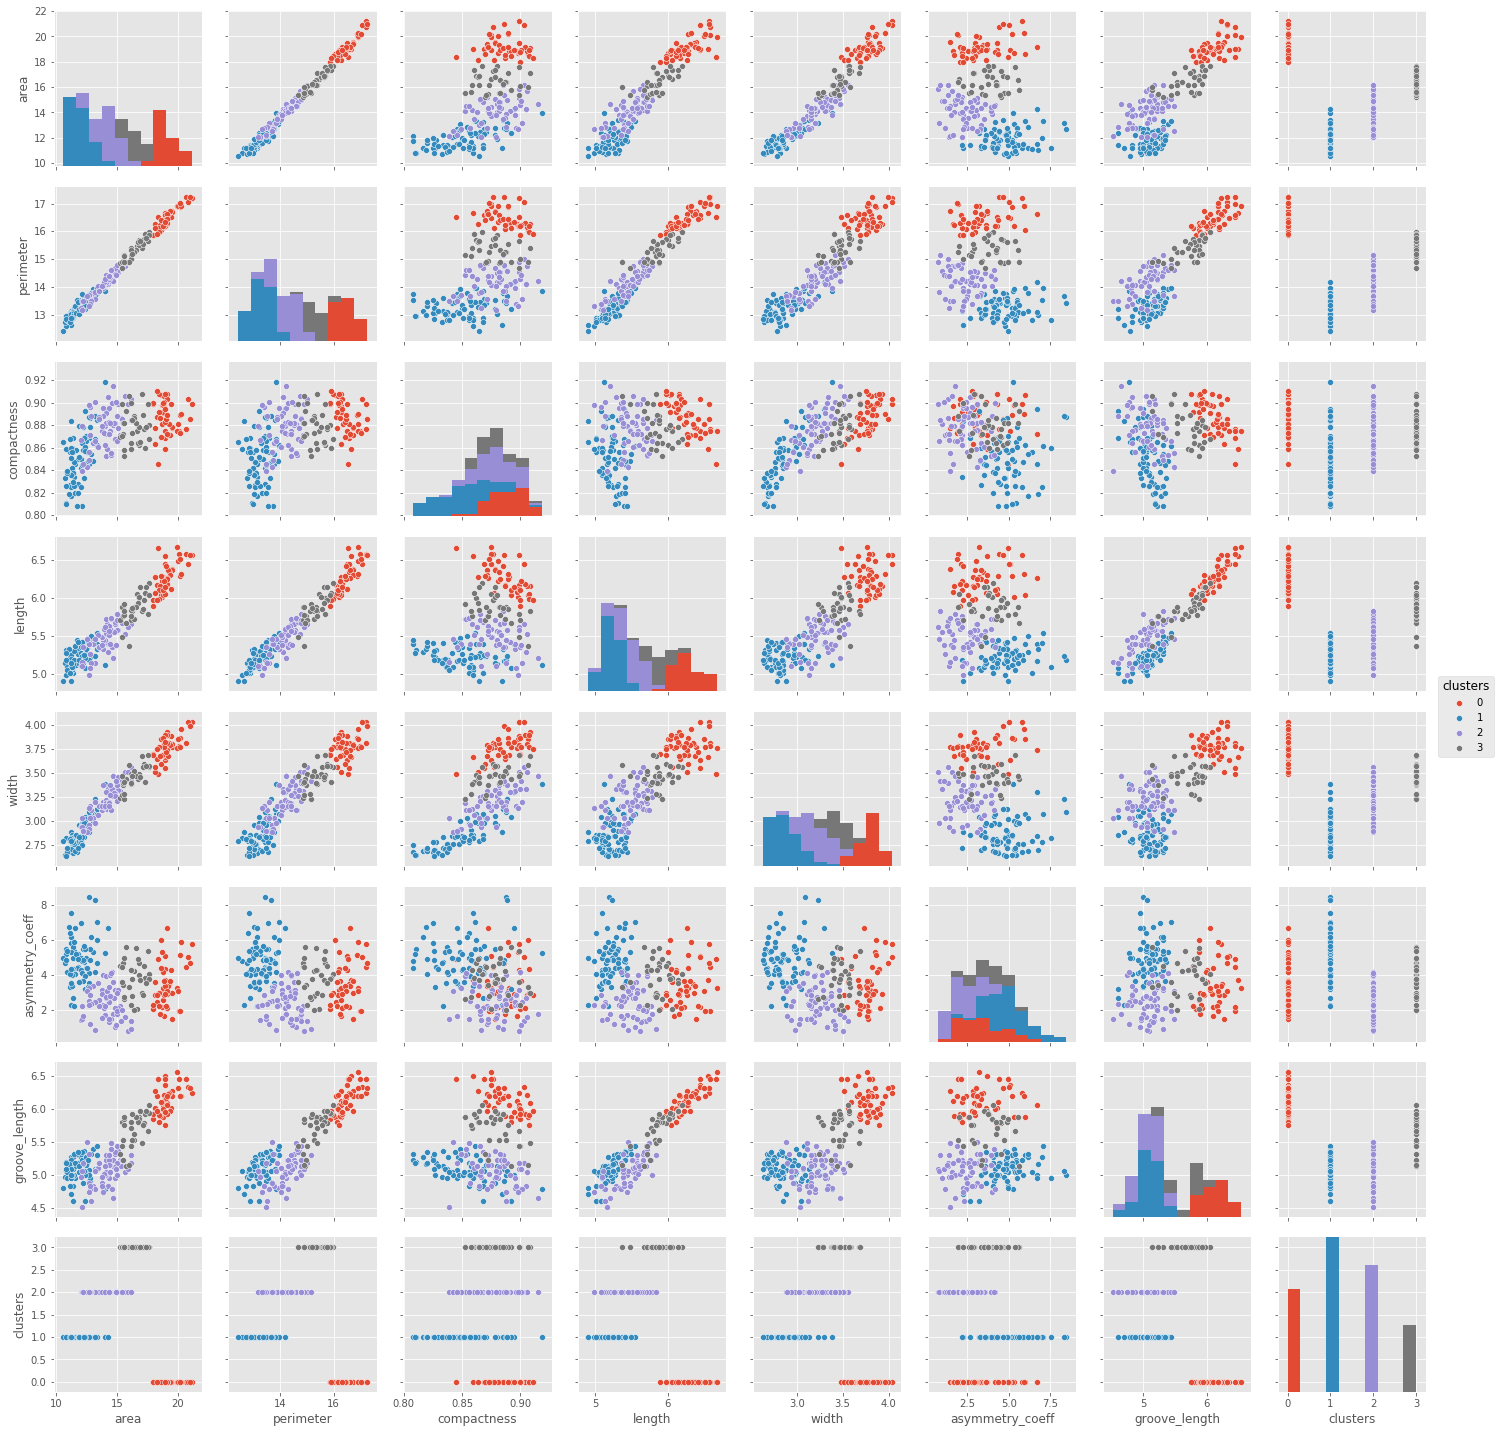

In [17]:
X_4 = seeds.drop('species', axis=1)
X_4['clusters']=labels_4

sns.pairplot(data=X_4, hue='clusters')

In [18]:
# k=4 was the best performing of the Ks i tested
# looks like scatter plot of perimeter vs. asymmetry_coeff
# distingusihed the cluster the best.

In [19]:
# 6 Clusters
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(X)
labels_6 = k_mean6.labels_
silhouette_score(X, labels_6)

0.3679558159604679

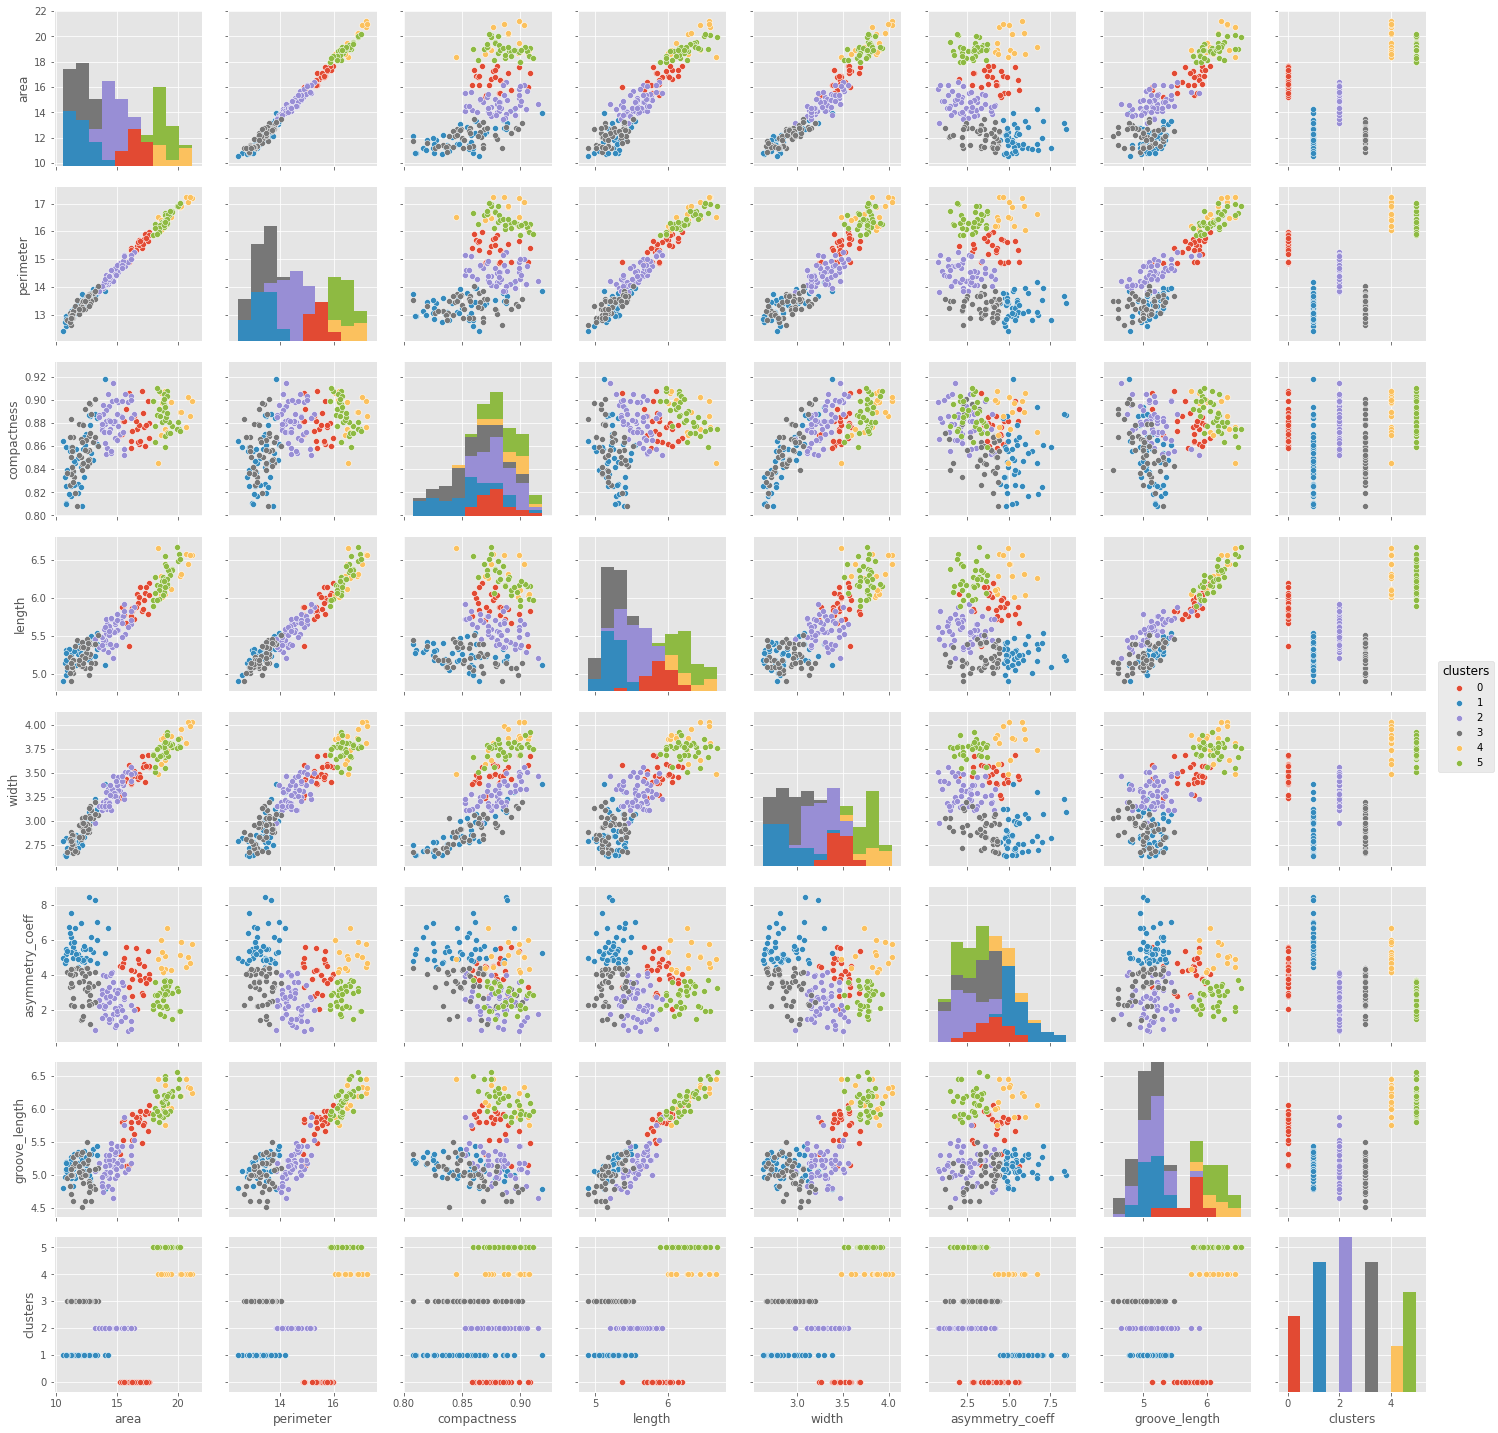

In [20]:
X_6 = seeds.drop('species', axis=1)
X_6['clusters']=labels_6

sns.pairplot(data=X_6, hue='clusters')

In [21]:
# perimeter vs asymmetry_coeff & area vs. asymmetry_coeff
# distiguished the clusters the best visually.

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [22]:
#necessary processing imports
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [23]:
# create dataframe to append info too
results = pd.DataFrame(columns = ['k','silhouette','processing'])


def cluster(ran, data, version):
    for k in ran:
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        labels = k_means.labels_
        score = silhouette_score(data, labels)
        results.loc[len(results)]=['c'+str(k), score, version]

In [24]:
def opt_cluster(ran, data):
    cluster(ran, data, 'default')
    
    # normalized version
    Xn = normalize(data)
    cluster(ran, Xn, 'normalized')
    
    # standard scale version
    SS = StandardScaler()
    Xs = SS.fit_transform(data)
    cluster(ran, Xs, 'standard_scaler')
    
    # minmax scale version
    MM = MinMaxScaler()
    Xmm = MM.fit_transform(data)
    cluster(ran, Xmm, 'min_max_scaler')

    return results.loc[results['silhouette'].idxmax()]


In [25]:
ran = list(range(2,12))

opt_cluster(ran,X)

k                   c2
silhouette    0.518287
processing     default
Name: 0, dtype: object

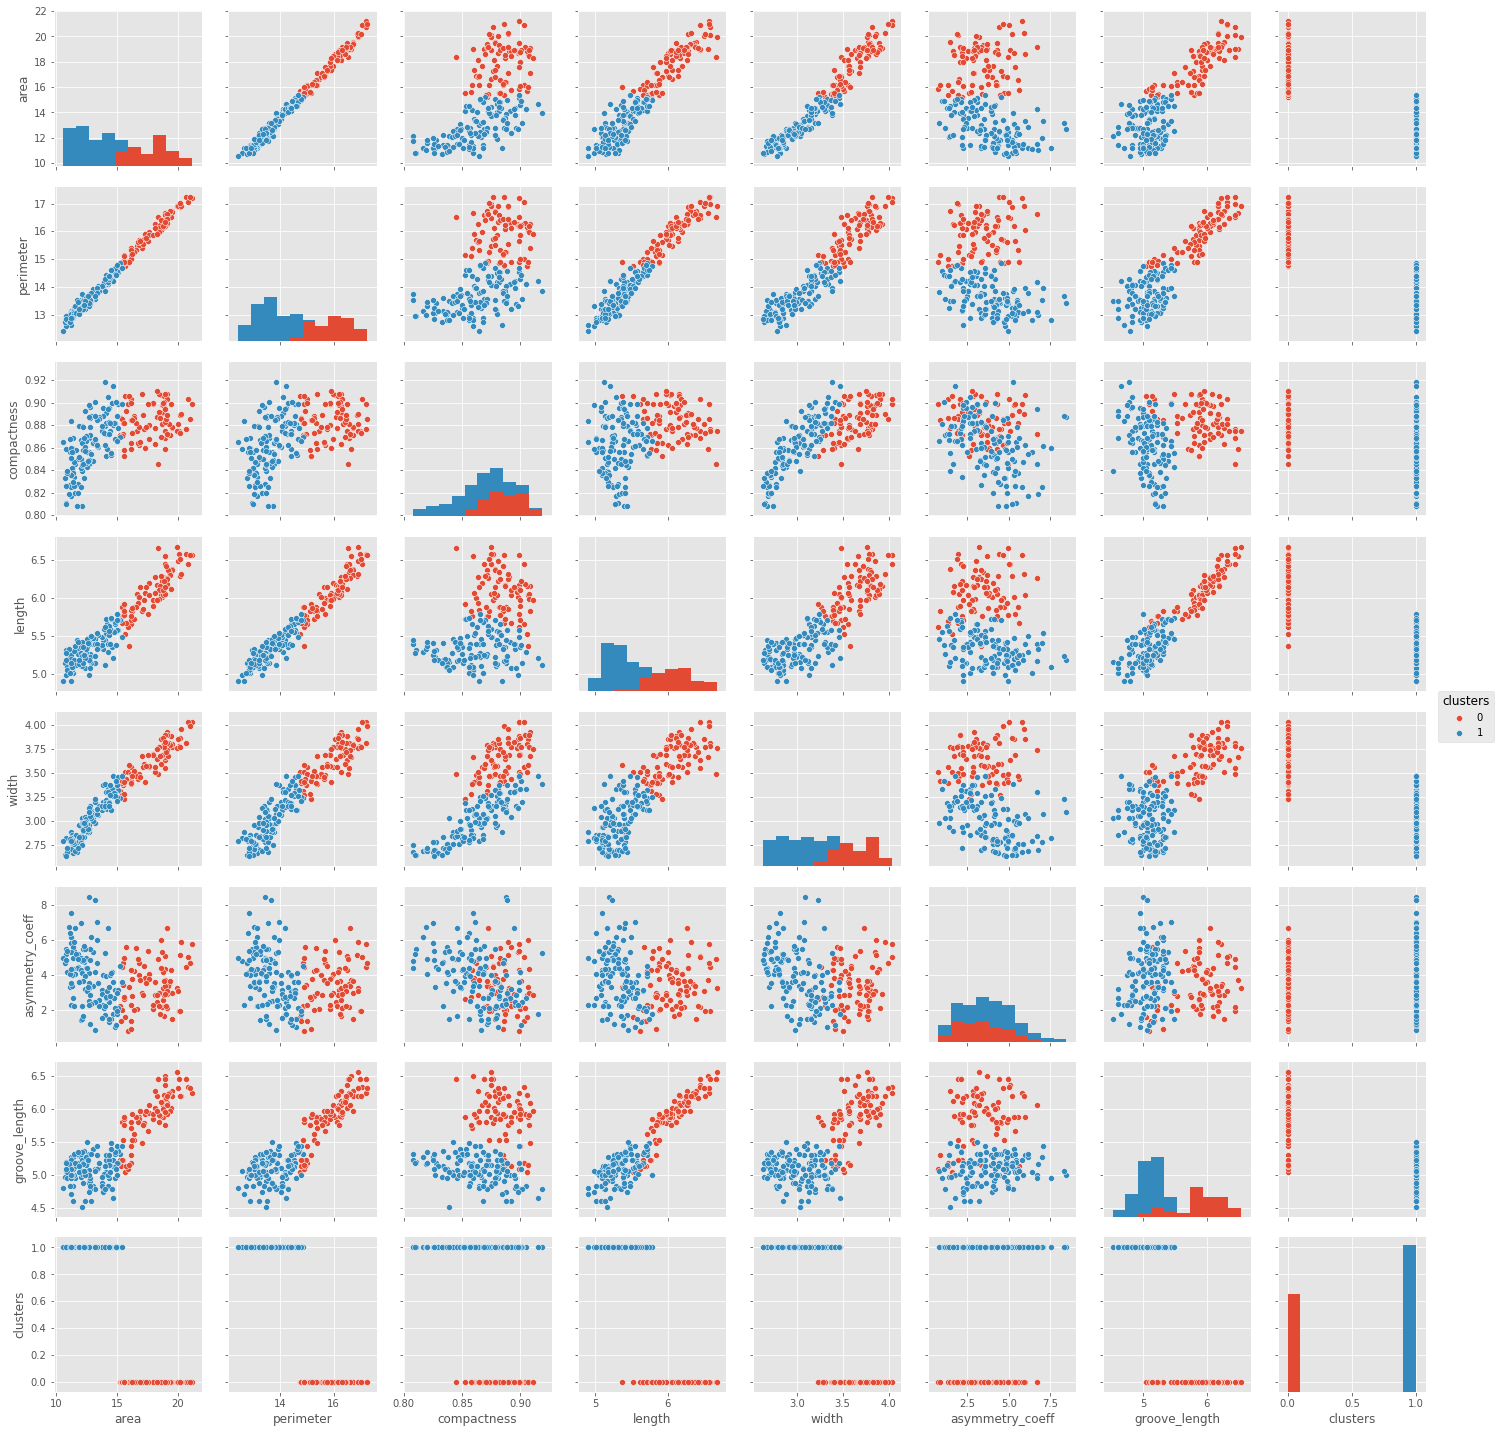

In [26]:
# build the model with the found optimal parameters
k_mean_opt = KMeans(n_clusters=2)
k_mean_opt.fit(X)
labels_opt = k_mean_opt.labels_

# no preprocessing required since default was the highest silouette
X_opt = seeds.drop('species', axis=1)

X_opt['clusters']=labels_opt
sns.pairplot(data=X_opt, hue='clusters')


As we can see the difference between our exploratory analysis with the original data and the results of finding an optimal clustering model, silouette score can be an untrustworthy means of evaluating a cluster.  As this is an unsupervised model it will just to conclusions that we as humans may know to not be true.   


 In this situation the non-processed data performed better than the processed, but there are a  variety of cases where the opposite is true.  Preprocessing and scaling is an extremely important step when clustering in order to negative the huge affects outliers could have on clusters. 
 
One of the more highly recommended scaling tactics is `MinMax`, because you can somewhat control the range / magnitude of your scale within multiple dimensions to augment your data in ways that could be more beneficial to the convergence of K-Means.